In [1]:
#importing required libraries

import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
import math
from numpy import genfromtxt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
#importing the data from given csv file.

my_data = genfromtxt('cm_dataset_2.csv', delimiter=',')

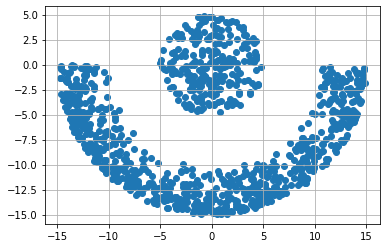

In [3]:
#Visualizing original data

plt.scatter(my_data[:,0],my_data[:,1])
plt.grid()
plt.show()

In [4]:
#############*****1(a)******####################

In [5]:
K=2

def lloyds(Z,data,N,K):
    '''
    Runs lloyds algorithm, return updated Z values
    
    Input:
    Z - Cluster assignment
    Data - original data
    N - number of data points
    K - number of clusters
    '''
    mean_x = np.zeros(K)
    mean_y = np.zeros(K)
    for i in range(0,K):
        if(sum(Z==i)!=0):
            mean_x[i] = sum((Z==i)*data[:,0])/sum(Z==i)
            mean_y[i] = sum((Z==i)*data[:,1])/sum(Z==i)
        else:
            mean_x[i]=0
            mean_y[i]=0
        
        
    
    #re-assignment
    for i in range(0,N):
        #re-assigning ith item.
        current_dist =((data[i,0]-mean_x[Z[i]])**2+(data[i,1]-mean_y[Z[i]])**2)**0.5
        mins=current_dist
        index_change = Z[i]
        for j in range(0,K):
            curr=((data[i,0]-mean_x[j])**2+(data[i,1]-mean_y[j])**2)**0.5
            if(curr<mins):
                mins=curr
                index_change = j
            
        if mins<current_dist:
            Z[i] = index_change
    
    return Z
            
            
            
            

In [6]:
def find_error(data,Z,N,K):
    """
    returns error for a give cluster assignment Z.
    
    Data - original data
    Z - cluster assignment matrix
    N - number of data points
    K - number of clusters.
    """
    error=0
    mean_x = np.zeros(K)
    mean_y = np.zeros(K)
    for i in range(0,K):
        if(sum(Z==i)!=0):
            mean_x[i] = sum((Z==i)*data[:,0])/sum(Z==i)
            mean_y[i] = sum((Z==i)*data[:,1])/sum(Z==i)
        else:
            mean_x[i]=0
            mean_y[i]=0
    
    
    for i in range(0,N):
        error = error + (data[i,0]-mean_x[Z[i]])**2 + (data[i,1]-mean_y[Z[i]])**2 
    
    return error
    

In [7]:
def initialize(K,N):
    '''
    Returns a Random initialization (Z)
    
    K - Number of clusters
    N- number of data points
    '''
    return np.random.randint(K,size=(N))

In [8]:
def plot_scatter(data,Z,titlee='',xlab='',ylab=''):
    '''
    Plots scatter graph of given cluster assignment
    '''
    colormap = np.array(['r', 'g','k','m','y'])
    plt.scatter(data[:,0],data[:,1], c=colormap[Z])
    plt.title(titlee)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

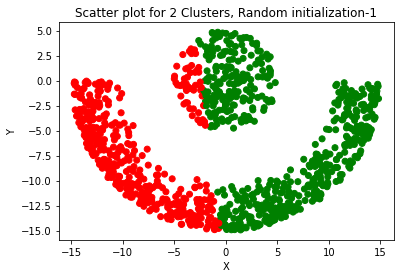

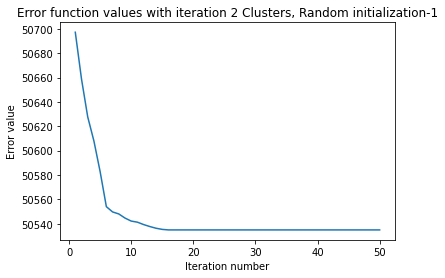

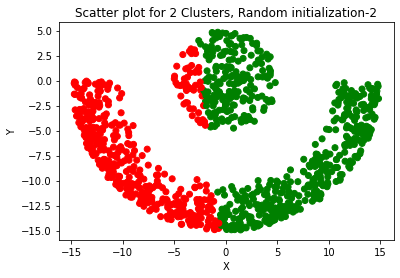

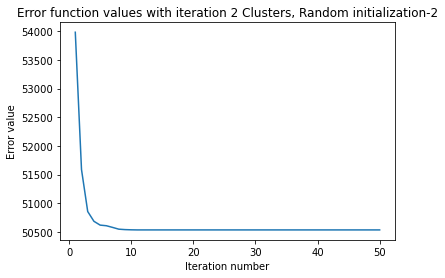

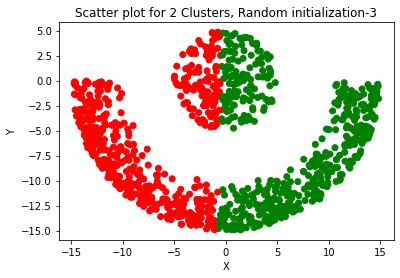

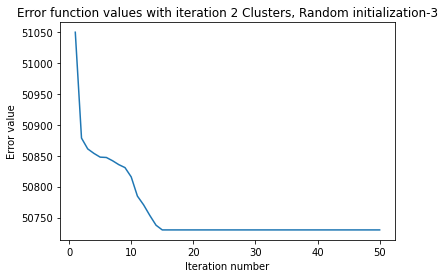

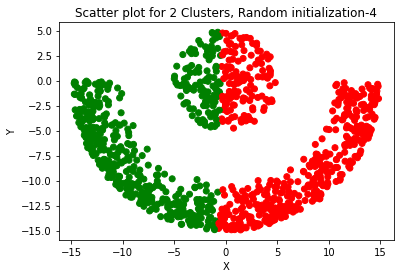

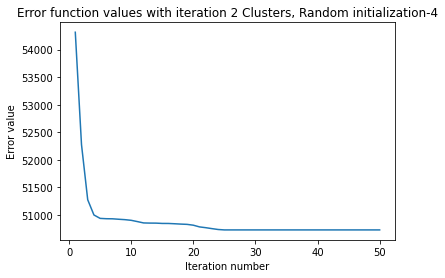

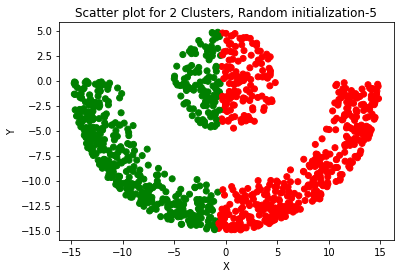

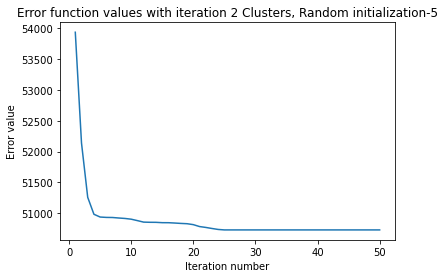

In [9]:
#plotting 2 clusters for same initialization.

for j in range(0,5):
    number_of_iterations = 50
    Z=np.random.randint(2,size=(1000))
    Error = np.zeros(number_of_iterations)
    xvals=np.linspace(1,number_of_iterations,number_of_iterations,dtype='uint8')
    for i in range(1,number_of_iterations+1):
        Z=lloyds(Z,my_data,1000,2)
        Error[i-1]=find_error(my_data,Z,1000,K)
        
    plot_scatter(my_data,Z,"Scatter plot for "+str(2)+" Clusters, Random initialization-"+str(j+1),"X","Y")
    plt.plot(xvals,Error)
    plt.title("Error function values with iteration "+str(2)+" Clusters, Random initialization-"+str(j+1))
    plt.ylabel("Error value")
    plt.xlabel('Iteration number')
    plt.show()

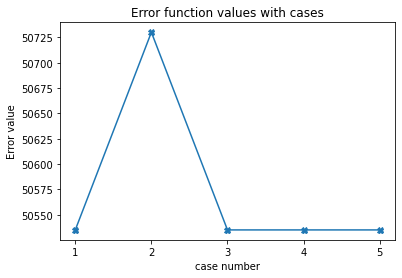

In [10]:
#visualizing the error over different initialization

E=np.zeros((5))
iteration_num=['1','2','3','4','5']
for j in range(0,5):
    Z=np.random.randint(2,size=(1000))
    #plot_scatter(my_data,Z)
    for i in range(1,100):
        Z=lloyds(Z,my_data,1000,2)
    
    e=find_error(my_data,Z,1000,2)
    E[j]=e
    
plt.plot(iteration_num,E,'X-')
plt.title("Error function values with cases")
plt.ylabel("Error value")
plt.xlabel('case number')
plt.show()

In [11]:
#############*****2(b)******####################

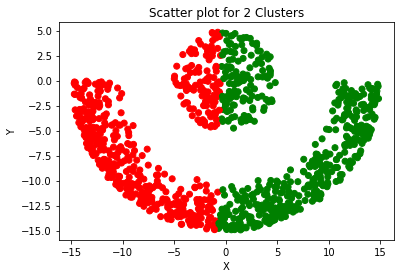

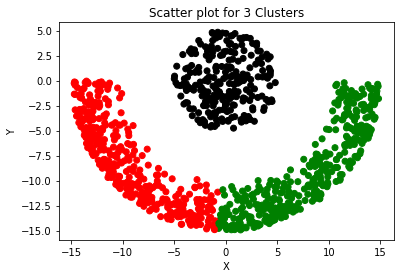

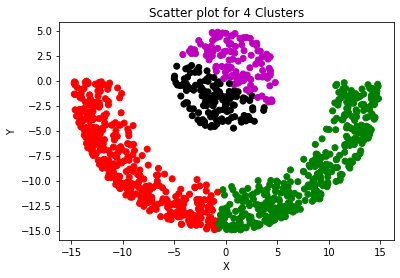

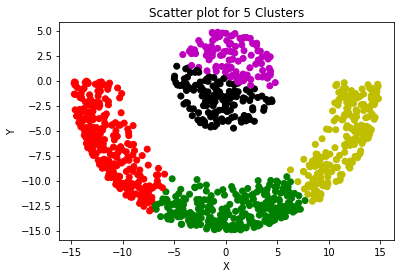

In [12]:
#visualizing different clusters
Zz=initialize(2,1000)


for K in range(2,6):
    Z=Zz
    number_of_iterations = 50
    #Error = np.zeros(number_of_iterations)
    #xvals=np.linspace(1,number_of_iterations,number_of_iterations,dtype='uint8')
    for i in range(1,number_of_iterations+1):
        Z=lloyds(Z,my_data,1000,K)
        #Error[i-1]=find_error(my_data,Z,1000,K)
    mean_x = np.zeros(K)
    mean_y = np.zeros(K)
    for i in range(0,K):
        if(sum(Z==i)!=0):
            mean_x[i] = sum((Z==i)*my_data[:,0])/sum(Z==i)
            mean_y[i] = sum((Z==i)*my_data[:,1])/sum(Z==i)
        else:
            mean_x[i]=0
            mean_y[i]=0
    #print(mean_x,mean_y)
    plot_scatter(my_data,Z,"Scatter plot for "+str(K)+" Clusters","X","Y")
    '''plt.plot(xvals,Error)
    plt.title("Error function values with iteration "+str(K)+" Clusters")
    plt.ylabel("Error value")
    plt.xlabel('Iteration number')
    plt.show()'''

In [13]:
#############*****2(c)******####################

In [14]:
def Kernel(x,y):
    '''
    returns a scalar value. calculates Kij.
    '''
    #Gaussian kernel: 
    #return math.exp(  sum(  ((x-y)**2) / (2000)  ) )
    return (1+sum(x*y))**2
    #return (sum(x*y))
def compute_kernel(data,n,d,f):
    '''
    Returns Kernel matrix, uses kernel function K.
    
    Input:
    data - original data
    n - number of data points
    f - kernel function
    d - dimension of input
    '''
    K=np.zeros((n,n))
    #data matrix size is 1000,2
    for i in range(0,1000):
        for j in range(0,1000):
            K[i,j] = f(data[i,:],data[j,:])
    
    return K  
    
    

In [15]:
##Computing eigenvalues and eigenvectors, and forming H matrix.
Kernel_matrix = compute_kernel(my_data,1000,2,Kernel)
eigenval,eigenvecs =eigh(Kernel_matrix)


indexes_of = eigenval.argsort()[::-1]
sorted_eigenvals = eigenval[indexes_of]
sorted_eigenvecs = eigenvecs[:,indexes_of]


H=sorted_eigenvecs[:,:2]

In [16]:
#Row wise Normalising the H matrix

denom = (H[:,1]**2+H[:,0]**2)**0.5
normalised_rows_H = H/denom.reshape((1000,1))

In [17]:
normalised_rows_H

array([[-0.90715227, -0.42080252],
       [-0.61843175,  0.78583852],
       [-0.60258376,  0.79805565],
       ...,
       [-0.70156516, -0.71260531],
       [-0.77186402,  0.63578765],
       [-0.69150936, -0.7223675 ]])

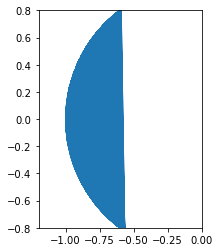

In [18]:
#visualizing normalized rows, which lie on a unit circle.
plt.plot(normalised_rows_H[:,0],normalised_rows_H[:,1])
plt.ylim(-0.8, 0.8)
plt.xlim(-1.2, 0)
ax = plt.gca()
ax.set_aspect('equal')
plt.draw()

In [19]:
def plot_new_data(normalised_rows_H,Z,titlee,xlablee,ylablee):
    '''
    plots normalised_rows, with colors.
    Z-assignment matrix
    '''
    colormap = np.array(['r', 'g','k','m','y'])
    plt.scatter(normalised_rows_H[:,0],normalised_rows_H[:,1],c=colormap[Z])
    plt.ylim(-1.2, 1.2)
    plt.xlim(-1.2, 1.2)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.title(titlee)
    plt.xlabel(xlablee)
    plt.ylabel(ylablee)
    plt.grid()
    plt.draw()
    plt.show()

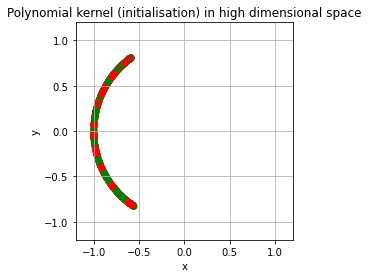

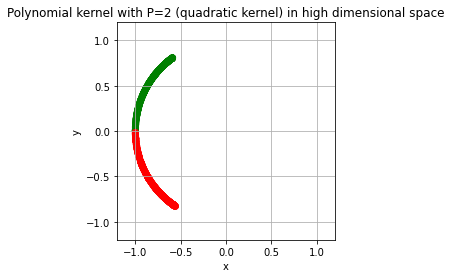

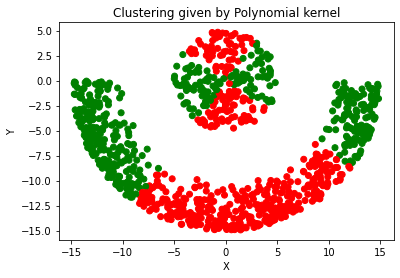

In [20]:
Z=np.random.randint(2,size=(1000))
plot_new_data(normalised_rows_H,Z,"Polynomial kernel (initialisation) in high dimensional space","x","y")
for i in range(1,10):
    Z=lloyds(Z,normalised_rows_H,1000,2)
plot_new_data(normalised_rows_H,Z,"Polynomial kernel with P=2 (quadratic kernel) in high dimensional space","x","y")
plot_scatter(my_data,Z,'Clustering given by Polynomial kernel','X','Y')

In [21]:
normalised_rows_H

array([[-0.90715227, -0.42080252],
       [-0.61843175,  0.78583852],
       [-0.60258376,  0.79805565],
       ...,
       [-0.70156516, -0.71260531],
       [-0.77186402,  0.63578765],
       [-0.69150936, -0.7223675 ]])

In [22]:
#############*****2(iv)******####################

In [23]:
new_Z=np.zeros(1000,dtype='uint8')
for i in range(0,1000):
    if (normalised_rows_H[i,0]>normalised_rows_H[i,1]):
        new_Z[i]=0
    else:
        new_Z[i]=1

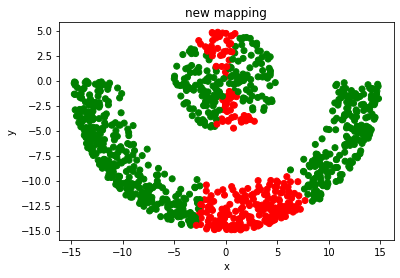

In [24]:
plot_scatter(my_data,new_Z,'new mapping','x','y')
